<a href="https://colab.research.google.com/github/s375301/youtube-suanlab/blob/main/exercise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터 분석 및 시각화

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns

In [96]:
sns.set_style('whitegrid')

In [97]:
titanic = sns.load_dataset('titanic')

In [98]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [99]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [100]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [102]:
# dropna() 결과, 데이터의 개수가 큰 폭으로 (891->182) 감소

In [103]:
titanic.var()

survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [104]:
titanic.mad() # mad: min absolute deviation

survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

In [105]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


### countplot

- 범주형 데이터 시각화

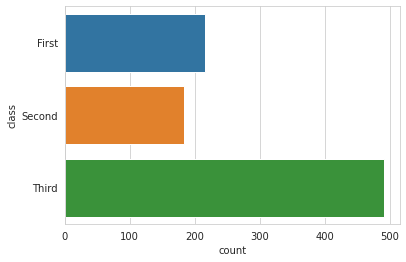

In [106]:
sns.countplot(y='class', data=titanic);

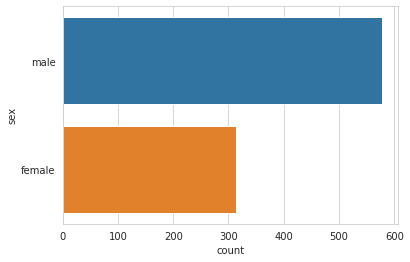

In [107]:
sns.countplot(y='sex', data=titanic);

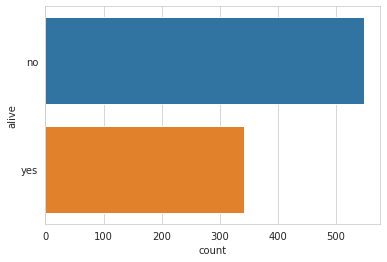

In [108]:
sns.countplot(y='alive', data=titanic);

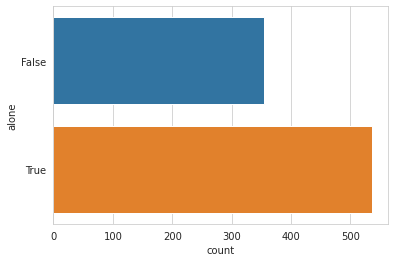

In [109]:
sns.countplot(y='alone', data=titanic);

In [110]:
titanic.groupby('class').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [111]:
titanic.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [112]:
titanic.query("alive=='yes'") # n= 342

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [113]:
titanic.query("alive=='yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [114]:
titanic.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [115]:
titanic.query("alive == 'yes'").groupby('class')[['age','fare']].describe()

age                        ...     fare                      
        count       mean        std  ...      50%         75%       max
class                                ...                               
First   122.0  35.368197  13.760017  ...  77.9583  111.481225  512.3292
Second   83.0  25.901566  14.837787  ...  21.0000   26.250000   65.0000
Third    85.0  20.646118  11.995047  ...   8.5167   15.875000   56.4958

[3 rows x 16 columns]

In [116]:
titanic.groupby('sex')['age'].agg([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [117]:
titanic.query("age > 30").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1,1,45.0,0,0,56.9292,True,False
Second,0,2,39.0,0,0,14.0000,True,True
Third,0,3,38.0,0,0,8.0500,True,True


In [118]:
titanic.query('fare < 20').groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0,1,38.5,0,0,0.0000,True,True
Second,0,2,30.0,0,0,13.0000,True,True
Third,0,3,25.0,0,0,7.8958,True,True


In [119]:
# First class의 fare == 0: 20파운드 이하로 살 수 없다.

In [120]:
titanic.groupby(['class', 'sex'])['age'].mean() # Series

class   sex   
First   female    34.611765
        male      41.281386
Second  female    28.722973
        male      30.740707
Third   female    21.750000
        male      26.507589
Name: age, dtype: float64

In [121]:
titanic.groupby(['class', 'sex'])['age'].mean().unstack() # DataFrame: 2 Series

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


### catplot

- categorical plot

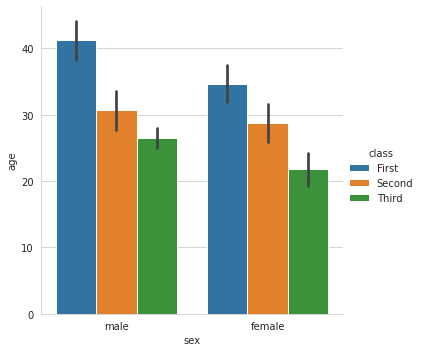

In [122]:
sns.catplot(x='sex', y='age',
            hue='class', kind='bar',
            data=titanic);

In [123]:
# 남자의 나이대가 여성보다 조금 더 높다.

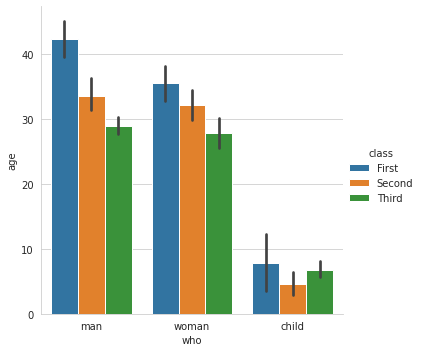

In [124]:
sns.catplot(x='who', y='age',
            hue='class', kind='bar',
            data=titanic);

In [125]:
# sex는 남성과 여성만을 분리하지만, who는 아이까지 포함한다.

In [126]:
titanic.groupby(['class','sex'])['fare'].mean().unstack()

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [127]:
titanic.groupby(['class','who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


In [128]:
# 전체적으로 아이>여성>남성 순으로 운임가격을 높게 지불하였음.
# 어쩌면 남성의 운임비용이 저렴하여 많이 탔다고 생각할 수도 있음.

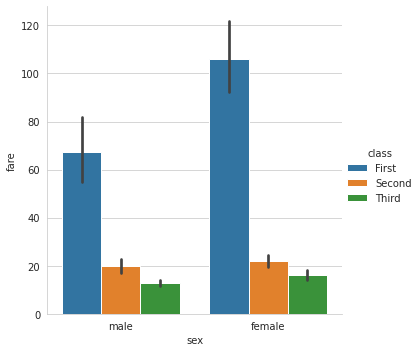

In [129]:
sns.catplot(x='sex', y='fare',
            hue='class', kind='bar',
            data=titanic);

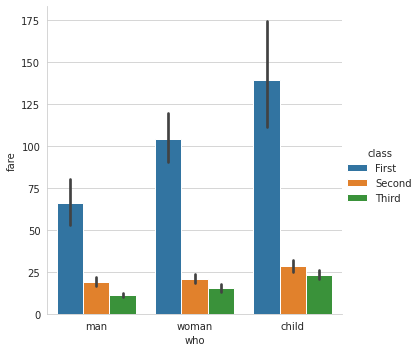

In [130]:
sns.catplot(x='who', y='fare',
            hue='class', kind='bar',
            data=titanic);

In [131]:
titanic.groupby(['class', 'sex'])['survived'].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [132]:
# 여성의 생존율이 높다.

In [133]:
titanic.pivot_table('survived', index='class', columns='who')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


In [134]:
# 3등급 생존율이 저조하며 2등급 아이들은 모두 생존하였다.

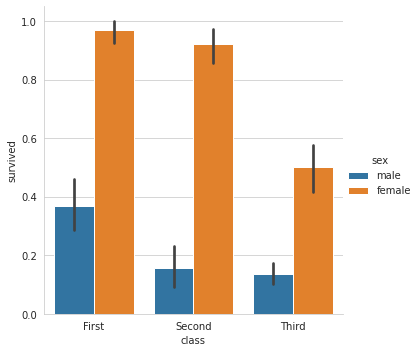

In [135]:
sns.catplot(x='class', y='survived',
            hue='sex', kind='bar',
            data=titanic);

In [136]:
# 여성 생존율이 월등히 높다.

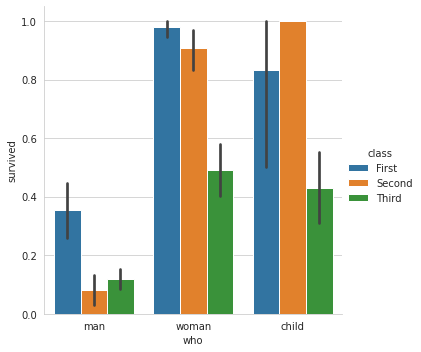

In [137]:
sns.catplot(x='who', y='survived',
            hue='class', kind='bar',
            data=titanic);

### pd.cut

- 연속/이산형 자료를 계층별로 카테고리형 범주화

In [138]:
age = pd.cut(titanic['age'], [0,18,40,80])
titanic.pivot_table('survived', ['sex', age], 'class') # age는 col명이 아닌 Series로 들어간 것.

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [139]:
titanic.pivot_table('survived', ['sex', 'age'], 'class').head # 잘못된 예

<bound method NDFrame.head of class         First  Second  Third
sex    age                        
female 0.75     NaN     NaN   1.00
       1.00     NaN     NaN   1.00
       2.00     0.0     1.0   0.25
       3.00     NaN     1.0   0.00
       4.00     NaN     1.0   1.00
...             ...     ...    ...
male   70.00    0.0     0.0    NaN
       70.50    NaN     NaN   0.00
       71.00    0.0     NaN    NaN
       74.00    NaN     NaN   0.00
       80.00    1.0     NaN    NaN

[145 rows x 3 columns]>

### pd.qcut

- quantile cut

In [140]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['who', age], 'class')

class              First    Second     Third
who   age                                   
child (0, 18]   0.833333  1.000000  0.431034
man   (0, 18]   0.500000  0.000000  0.086957
      (18, 40]  0.478261  0.063492  0.146199
      (40, 80]  0.280000  0.095238  0.064516
woman (0, 18]   1.000000  1.000000  0.461538
      (18, 40]  0.979167  0.914894  0.480000
      (40, 80]  0.961538  0.846154  0.111111

In [141]:
titanic.pivot_table('survived', ['who', age], [fare, 'class'])

fare           (-0.001, 8.662]            ... (26.0, 512.329]      
class                    First     Third  ...          Second Third
who   age                                 ...                      
child (0, 18]              NaN  0.666667  ...             1.0  0.08
man   (0, 18]              NaN  0.125000  ...             0.0  0.00
      (18, 40]             0.0  0.138462  ...             0.0  0.50
      (40, 80]             NaN  0.074074  ...             0.0   NaN
woman (0, 18]              NaN  0.666667  ...             NaN  0.00
      (18, 40]             NaN  0.550000  ...             1.0  0.25
      (40, 80]             NaN  0.000000  ...             1.0  0.00

[7 rows x 8 columns]

In [142]:
# 너무 낮은 운임비용으로는 1등급 칸에 탑승할 수 없다.
# 큰 차이로 구분되는 점이 없다.

In [143]:
titanic.pivot_table('survived', index='who', columns='class', margins=True) # margins: 총계

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


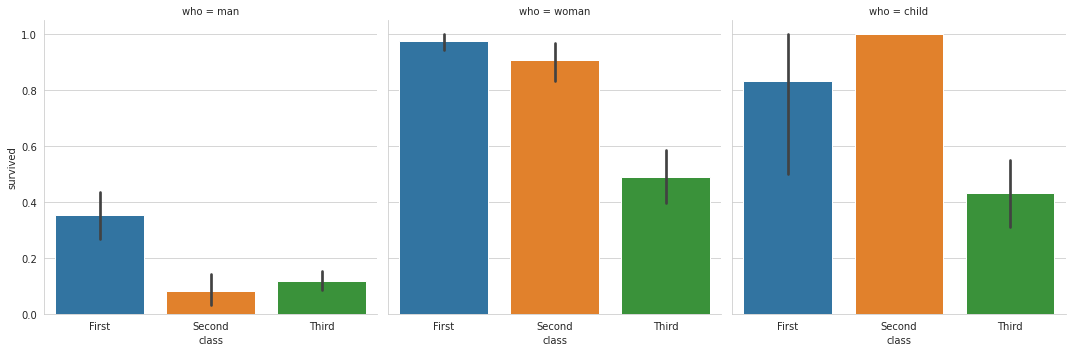

In [144]:
sns.catplot(x='class', y='survived',
           col='who', kind='bar', # col: facet_wrap, hue: in one graph
           data=titanic);

In [145]:
# 여자와 아이들이 생존율이 높다.

In [146]:
titanic.pivot_table('survived', index='deck', columns='class', margins=True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


In [147]:
# 등급에 따라서 탑승위치가 정해진다. (예: 3등급은 EFG 데크만에만 위치)

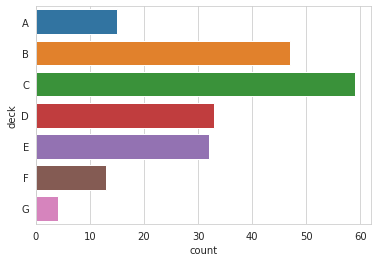

In [148]:
sns.countplot(y='deck', data=titanic);

In [149]:
# B, C 데크가 가장 많다.

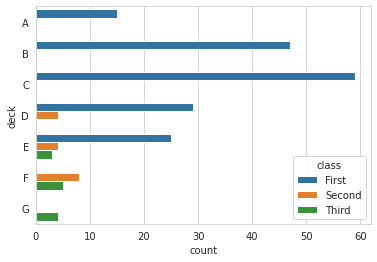

In [150]:
sns.countplot(y='deck', hue='class', data=titanic);

In [151]:
# 1등급은 A~E까지 다양한 데크에 있다.
# 2, 3등급은 각 3개씩 데크에 위치해있다.

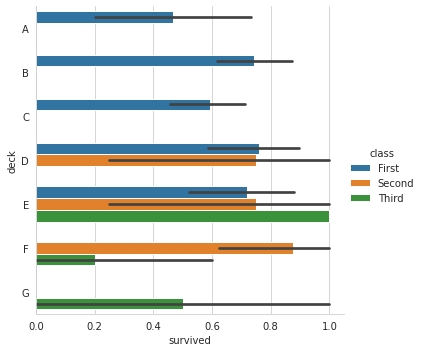

In [152]:
sns.catplot(x='survived', y='deck',
            hue='class', kind='bar',
            data=titanic);

In [153]:
# F, G쪽 데크의 3등급 생존자가 적다.

In [154]:
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


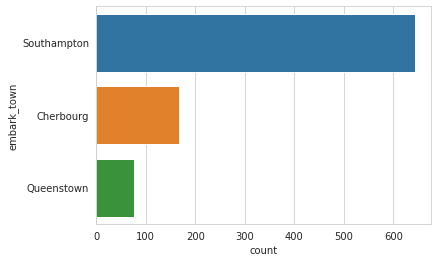

In [155]:
sns.countplot(y='embark_town', data=titanic);

In [156]:
# Sounthampton 탑승객 수가 가장 많다.

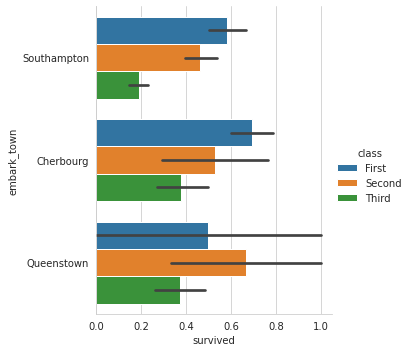

In [157]:
sns.catplot(x='survived', y='embark_town',
            hue='class', kind='bar',
            data=titanic);

In [158]:
# 생존의 여부에는 탑승항구가 크게 상관 없어보인다.

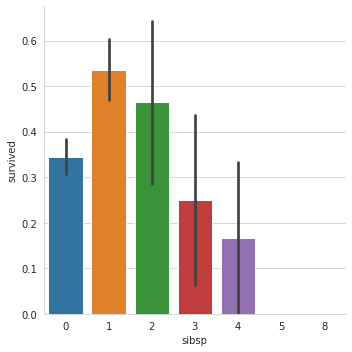

In [159]:
sns.catplot(x='sibsp', y='survived',
            kind='bar',
            data=titanic);

In [160]:
# 형제자매가 한명정도 있을 때 생존율이 가장 높았다.
# 오히려 형제자매가 없는 경우, 생존율은 떨어졌다.

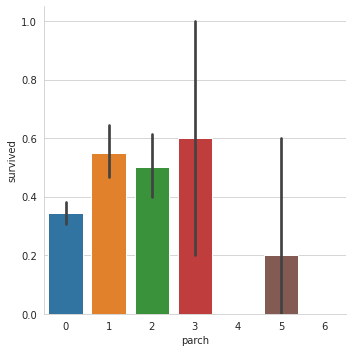

In [161]:
sns.catplot(x='parch', y='survived',
            kind='bar',
            data=titanic);

In [162]:
# 자녀여부에서는 큰 인사이트가 없다.

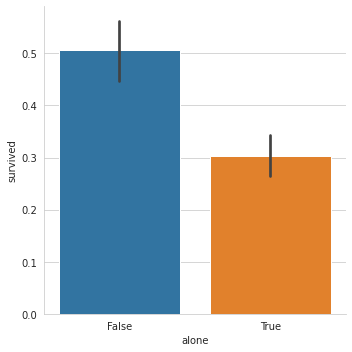

In [163]:
sns.catplot(x='alone', y='survived',
            kind='bar',
            data=titanic);

In [164]:
# 혼자 있는 경우보다 동반자가 있는 경우, 생존율이 높았다.

all copyrights deserved by [SuanLab](https://https://youtu.be/wBQnyesc9bU)